# Name: Joyi Bhattacharjee
# Problem Set 5 

### Learning Objective:

- Create Python code to automate a given task.

### Overview:

This problem set assesses your ability to construct a simulation model by probabilistic sampling, as discussed in the lectures for Week 5. Unlike the previous two problem sets, you are no longer required to give your steps in algorithmic thinking, but can simply include your final solutions here. (Nevertheless, you are still encouraged to apply the steps of algorithmic thinking on your own when solving the difficult problems, and it is probably faster overall to go through those steps in a systematic way rather than trying to jump steps and code everything at once, as the steps make debugging much faster.)

### Grading

There are three possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for 100% mastery of the material, as the little details matter a lot in programming. 

| Grade | Description |
|--|--|
| 5 out of 5 | Perfect submission with no significant errors. | 
| 4 out of 5 | Near perfect submission with one or more significant errors. |
| 2 out of 5 | Apparent effort but far from perfect. |

## Q1. Forecasting Bonus Earnings

Nadeem is a car salesperson who faces the following incentive scheme at the dealership where he works. For each month, there is a "target profit" of 80,000 that the dealership sets for the month. If he makes more profit for the dealership that month than the target, then he receives a 20% bonus on the amount of profit over the target. However, if he does not meet the target, he receives no bonus.  For example, if he makes 100,000 of profit, then he receives a 4,000 bonus that month: $(100000-80000)\times 0.2=4000$. However, if he makes 70,000, then he receives zero bonus that month. Nadeem would like to understand the distribution of his monthly bonus.

Nadeem estimates that the number of cars he sells is binomial distributed with $n=200$ and $p=0.2$. On every car he sells, the amount of profit he makes for the dealership is normally distributed with $\mu=3000$ and $\sigma=1000$, and the profit from each car is independent of another.

Create a `Series` called "monthlyBonus" with 100,000 samples of his monthly bonus. As in the sample outputs below, print the mean and the standard deviation rounded to the nearest integer, as well as the probability the bonus is less than 5000, with the probability being rounded to three decimal places. Finally, plot a histogram of simulated earnings with 100 bins.

**Note:** Given the inherent randomness with simulation, your code may still be correct if your estimates are slightly different from those shown below.

In [2]:
from numpy import random
from numpy.random import default_rng
import pandas as pd 

In [53]:
# Write your final code here


rng=default_rng()
TargetProfit=80000
monthlyBonus=pd.Series()

# bonus.append(0)
for i in range(1,100000):
    TotalProfit=0
    carSold=rng.binomial(200,0.2)
    for j in range(0,carSold):
        carProfit=rng.normal(3000,1000)
        TotalProfit=carProfit +TotalProfit
    
    if TotalProfit>TargetProfit:
        monthlyBonus.loc[i]=(TotalProfit-TargetProfit)*0.2
    else:
        monthlyBonus.loc[i]=0




C:\Users\joyib\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


Mean bonus: 8019.0
Standard deviation: 3607.0
Probability that bonus is less than 5000: 0.206


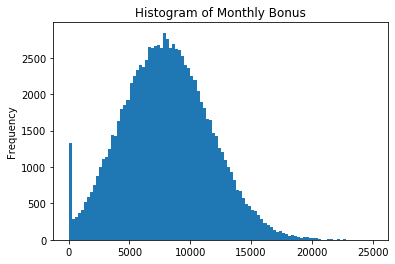

In [54]:
print(f'Mean bonus: {round(monthlyBonus.mean(),0)}')
print(f'Standard deviation: {round(monthlyBonus.std(),0)}')
print(f'Probability that bonus is less than 5000: {round((monthlyBonus<5000).mean(),3)}')

monthlyBonus.plot(kind="hist",title="Histogram of Monthly Bonus",bins=100)

## Q2. Simulating Stock Prices

This question asks you to simulate the weekly price of a certain stock, given the initial price, the expected change in price per week, the standard deviation per week, and the number of weeks to simulate.

**Write a function called "simulatePrice" with the following input arguments:**

- **initial**: a positive number representing the price in Week 0.
- **mu**: the expected change in price from one week to the next.
- **sigma**: the standard deviation in the change in price.
- **N**: the number of weeks to simulate.

The function should return a Pandas Series containing the simulated price of the stock from Week 0 through N. (Note that the initial price is the first entry and is not simulated.) 

You should assume the following probabilistic model. Suppose the price in week $t-1$ is $p_{t-1}$, then the price in week $t$ is given by

$$p_t = \begin{cases}
0 & \text{ if $p_{t-1} =0$, } \\
\max(0, p_{t-1}+\epsilon_t) & \text{ if $p_{t-1} > 0 $,}
\end{cases}$$
where $\epsilon_t$ is independently and Normally distributed with mean **mu** and standard deviation **sigma**, as given by the input arguments.

In [10]:
# Write your final code here
def simulatePrice(initial,mu,sigma,N):
    price=pd.Series()
    price.loc[0]=initial

    for week in range(1,N+1):
        if price[week-1]==0:
            price.loc[week]=0
        else:
            randomNum=random.normal(mu,sigma)
            price.loc[week]=max(0,(randomNum+price[week-1]))
    return price



The following output shows the result of running the code with initial price of 1, mu=0.01, sigma=0.2, and N=5 weeks.

In [11]:

random.seed(0)
simulatePrice(1,0.01,0.2,5)

C:\Users\joyib\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


0    1.000000
1    1.362810
2    1.452842
3    1.658590
4    2.116768
5    2.500280
dtype: float64

The following plots one random sequence of 52 weeks.

C:\Users\joyib\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


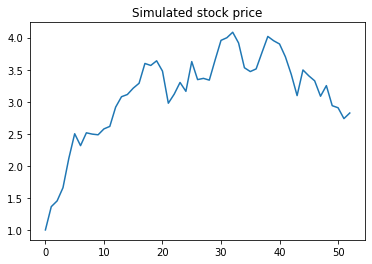

In [12]:
random.seed(0)
simulatePrice(1,0.01,0.2,52).plot(title='Simulated stock price')

C:\Users\joyib\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


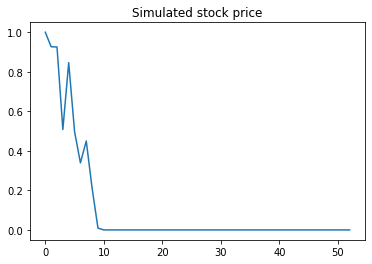

In [16]:
random.seed(2)
simulatePrice(1,0.01,0.2,52).plot(title='Simulated stock price')

The following plots another random sequence and illustrates that once price hits zero, it stays there forever.

## Q3. Simulating a Strategy for Stock Trading

This question asks you to evaluate an algorithmic trading strategy using a time series of stock prices, similar to the output in Q2.

**Write a function called "simulateTrades" with the following input arguments:**

- **prices**: a pandas Series of stock prices, with each entry representing the price of the stock in a given week. You can assume that all given prices are non-negative (i.e. $\ge 0$).
- **cash**: a positive decimal number designating the total amount of money you have at the very beginning, before any trades occur in Week 0. You use up cash when buying stocks and gain cash when selling stocks.
- **p_L**: a threshold on the price to purchase. As soon as the stock price is less than or equal to this price, assuming that the price is non-zero, you would purchase as many shares as you can using all the cash you have. (**Note: you can only purchase an integer number of shares.** You can round down a number $n$ using the code `int(n)`. i.e., `int(3.6)` would yield 3.) If the price is equal to zero, then you would not purchase.
- **p_H**: a threshold on the price to sell. As soon as the stock price is greater than or equal to this price, you would sell all the shares you have and convert it to cash. 

Assume that at the beginning, you have zero shares of the stock. Moreover, in the last week, you have to sell all the shares you have regardless of the price. **The function should return (not print) the total amount of cash you have at the end of all periods.** 

For example, suppose that `prices=pd.Series([1.1,1.3,0.8,1.3,1.6,0.4])`. Then

- `simulateTrades(prices, 8, 0.8, 1.6)` returns 16.0 because you would buy 10 shares when the price hits 0.8 and sell then for 1.6 each when the price reaches 1.6. In the last period, you buy 40 shares at 0.4 but sell everything again at that price, so your cash doesn't change.
- `simulateTrades(prices, 8, 0.8, 1.7)` returns 4.0 because while the sell price of 1.7 is never reached, you are stuck with 10 shares, which you are forced to sell in the last period for 0.4 each.
- `simulateTrades(prices, 10, 0.8, 1.6)` returns 19.6 because you buy 12 shares when the price reaches 0.8, with 0.4 cash left, and you sell all 12 shares at a price of 1.6. Your ending cash is $0.4+1.6 \times 12=19.6$.
- `simulateTrades(prices, 8, 0.7, 1.6)` returns 8.0 because the price is never low enough for you to buy, so you end up with the same amount of cash you had at the beginning.
- `simulateTrades(prices, 8, 0.8, 1.2)` returns 13.0 because you buy the 10 shares when the price hits 0.8 and sell everything when the price hits 1.3.
- `simulateTrades(prices, 11, 1.2, 1.3)` returns 21.0 because you immediately buy 10 shares since the opening price of 1.1 is lower than 1.2. You sell these shares when the price hits 1.3, and now you have 13 dollars of cash. Once the price goes down to 0.8, you buy 16 shares, and have 0.2 in cash left. You sell those 16 shares when the price hits 1.3, so the final cash is $0.2+16 \times 1.3 = 21.0$.

In [3]:
# Write your final code here
import pandas as pd

def simulateTrades(prices,cash,p_L,p_H):
    balance=cash
    week=0
    netShare=0
    for price in prices:
        week=week+1
        if week==len(prices):
            balance=(netShare*price)+balance
        elif price<=p_L and price > 0:
            sharebuy=int(balance/price)
            netShare=netShare+sharebuy
            cashSpent=sharebuy*price
            balance=balance-cashSpent
        elif price>=p_H and price > 0:
            sharesold=netShare
            cashGain=sharesold*price
            balance=balance+cashGain
            netShare=netShare-sharesold
    return balance
    

In [4]:
# Sample runs
import pandas as pd
prices=pd.Series([1.1,1.3,0.8,1.3,1.6,0.4])
simulateTrades(prices, 8, 0.8, 1.6)

16.0

In [5]:
simulateTrades(prices, 8, 0.8, 1.7)

4.0

In [6]:
simulateTrades(prices, 10, 0.8, 1.6)

19.6

In [7]:
simulateTrades(prices, 8, 0.7, 1.6)

8.0

In [8]:
simulateTrades(prices, 8, 0.8, 1.2)

13.0

In [9]:
simulateTrades(prices, 11, 1.2, 1.3)

21.0

### Illustration: Combining Q2 and Q3 into One Simulation Model

Once you have finshed Q2 and Q3, the following code illustrates how you can combine them to forecast the performance of the trading strategy, given the parameters initial, mu, sigma, N, cash, p_L and p_H. 

C:\Users\joyib\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\joyib\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Mean: 10515.432973547717
Standard deviation: 5883.643000559876


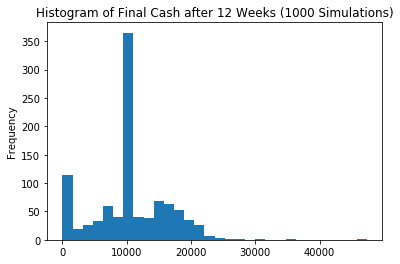

In [59]:
# Input parameters (you can play with them and re-run this cell)
initial=1
mu=0.01
sigma=0.2
N=12     
cash=10000
p_L=0.9
p_H=1.3

# Combining Q2 and Q3
finalCash=pd.Series()
for i in range(1000):
    prices=simulatePrice(initial,mu,sigma,N)
    finalCash.loc[i]=simulateTrades(prices,cash,p_L,p_H)
finalCash.plot(kind='hist',title='Histogram of Final Cash after 12 Weeks (1000 Simulations)',bins=30)
print('Mean:', finalCash.mean())
print('Standard deviation:', finalCash.std())

## Q4. Simulating Demand under Price Promotions

Suppose that a grocery store offers promotions on a certain product with probability $0.3$ every month, independent from other months. Conditional on whether there is a promotion in a month and on the promotion pattern of previous months, the monthly demand for the product is independently and normally distributed with the following parameters. (Assume that demand can take any decimal number and ignore the issue of negative demand.)

| Month | Mean ($\mu$) | Standard Deviation ($\sigma$) |
|--|--|--|
| No promotion | 500 | 100 |
| Promotion | 800 + 100$t$ | 150 |

In the above table, $t$ is the number of months without a promotion since the last promotion. For example, if last month had a promotion, then $t=0$. If the neither of the last two months had a promotion but the month before had one, then $t=2$.

**Write a function called "simulateDemand" with one input argument:**

- **n**: the number of months to simulate. (Assume this is at least 1).

**The function should return a list of $n$ numbers corresponding to $n$ consecutive months of simulated demand for the product.** Assume that just prior to the months in the simualtion, there was a promotion, so $t=0$ in the beginning. 

C:\Users\joyib\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


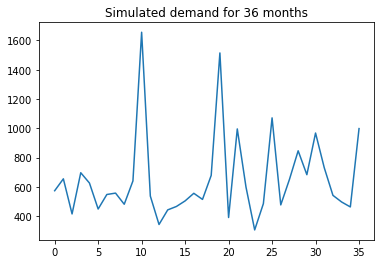

In [9]:
# Write your final code here

demand=pd.Series()

def simulateDemand(n):
    t=0
    for i in range(0,n):      
        promotion=random.choice([1,0],p=[0.3,0.7])
#         print(i,"\t",t,"\t",promotion)
        if promotion==1:
            latest_promo_month=i
            demand.loc[i]=random.normal(800+100*t,150)
            t=0
        elif promotion==0:
            t=t+1
            demand.loc[i]=random.normal(500,100)
        
    return demand

import pandas as pd
from numpy import random
random.seed(0)
pd.Series(simulateDemand(36))\
    .plot(title='Simulated demand for 36 months')